In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

# <font color = 'red'> ЛР 4. Exploratory data analysis Постановка задачи классифкации. </font>

# <font color = 'red' size = 5>Задание 1 </font>

1. Изучите примеры точечной работы с признаками в исходных данных. 
2. Поработав в документацией и примерами проведите отбор и подготовку признаков для знаменитого [titanik-датасета](https://www.kaggle.com/c/titanic/data) , а также для данных об  [операторах](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets)
    +  2.1 Визуализируйте признаки. Определите их типы.
    +  2.2 Удалите аномальные данные, где необходимо (простейшими методами z-score и IQR).
    +  2.3 Определите важные признаки с помощью описательной статитсики и корреляции.
    +  2.4 Заполните пропуски и поработайте с данными по своему усмотрению.
    +  2.5 Подготовленный датасет сохраните в новый csv файл.
   
        



[https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)


## Titanik-датасет

In [492]:
titanik_data = pd.read_csv('train.csv')
titanik_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [493]:
titanik_data = titanik_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanik_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [494]:
titanik_data.info()
#видно, что 3 из 8 признаков типа object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [495]:
titanik_data.describe()
#базовая статистика количественных данных

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


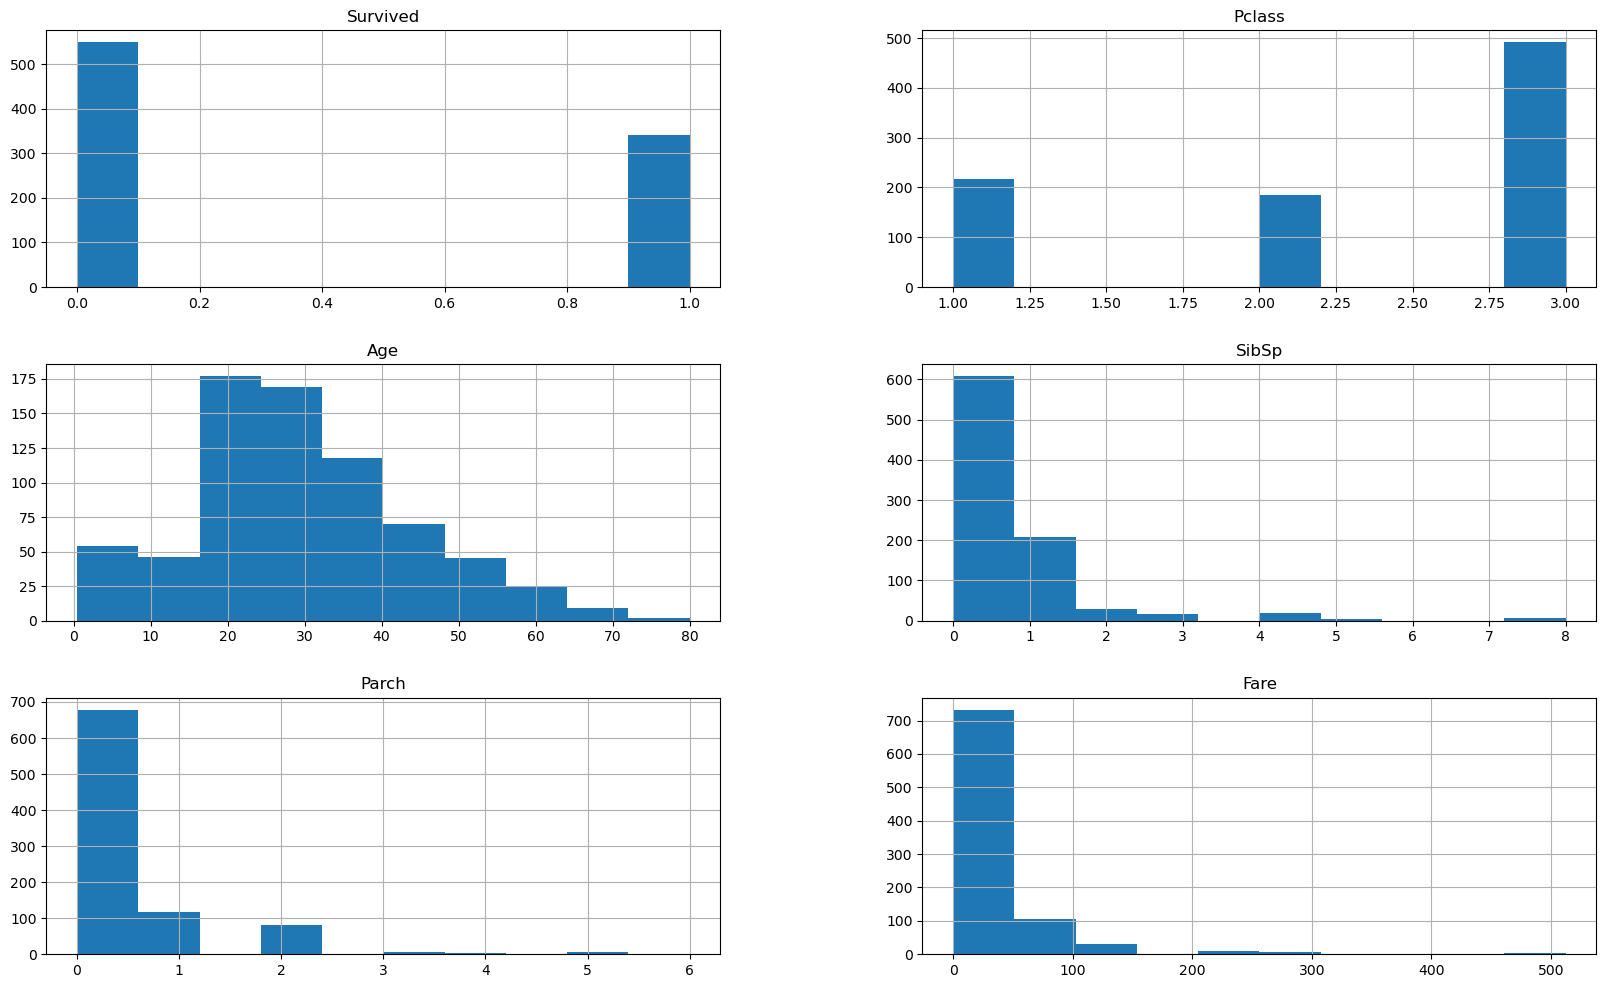

In [496]:
features = ['Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']
titanik_data[features].hist(figsize=(20,12));

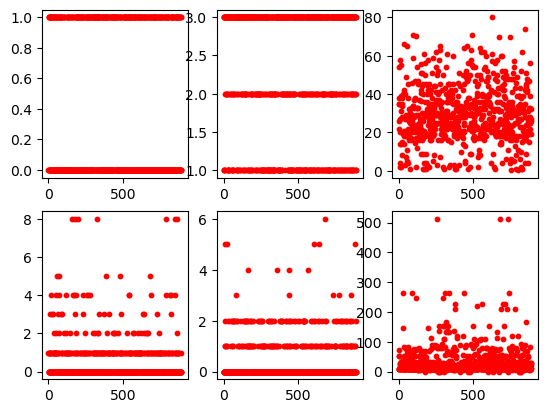

In [497]:
titanik_data[features].values.T
for i in range(len(features)):
    plt.subplot(2,3,i + 1)
    plt.scatter(range(len(titanik_data[features[i]])), titanik_data[features[i]], c='r', s=10)
    

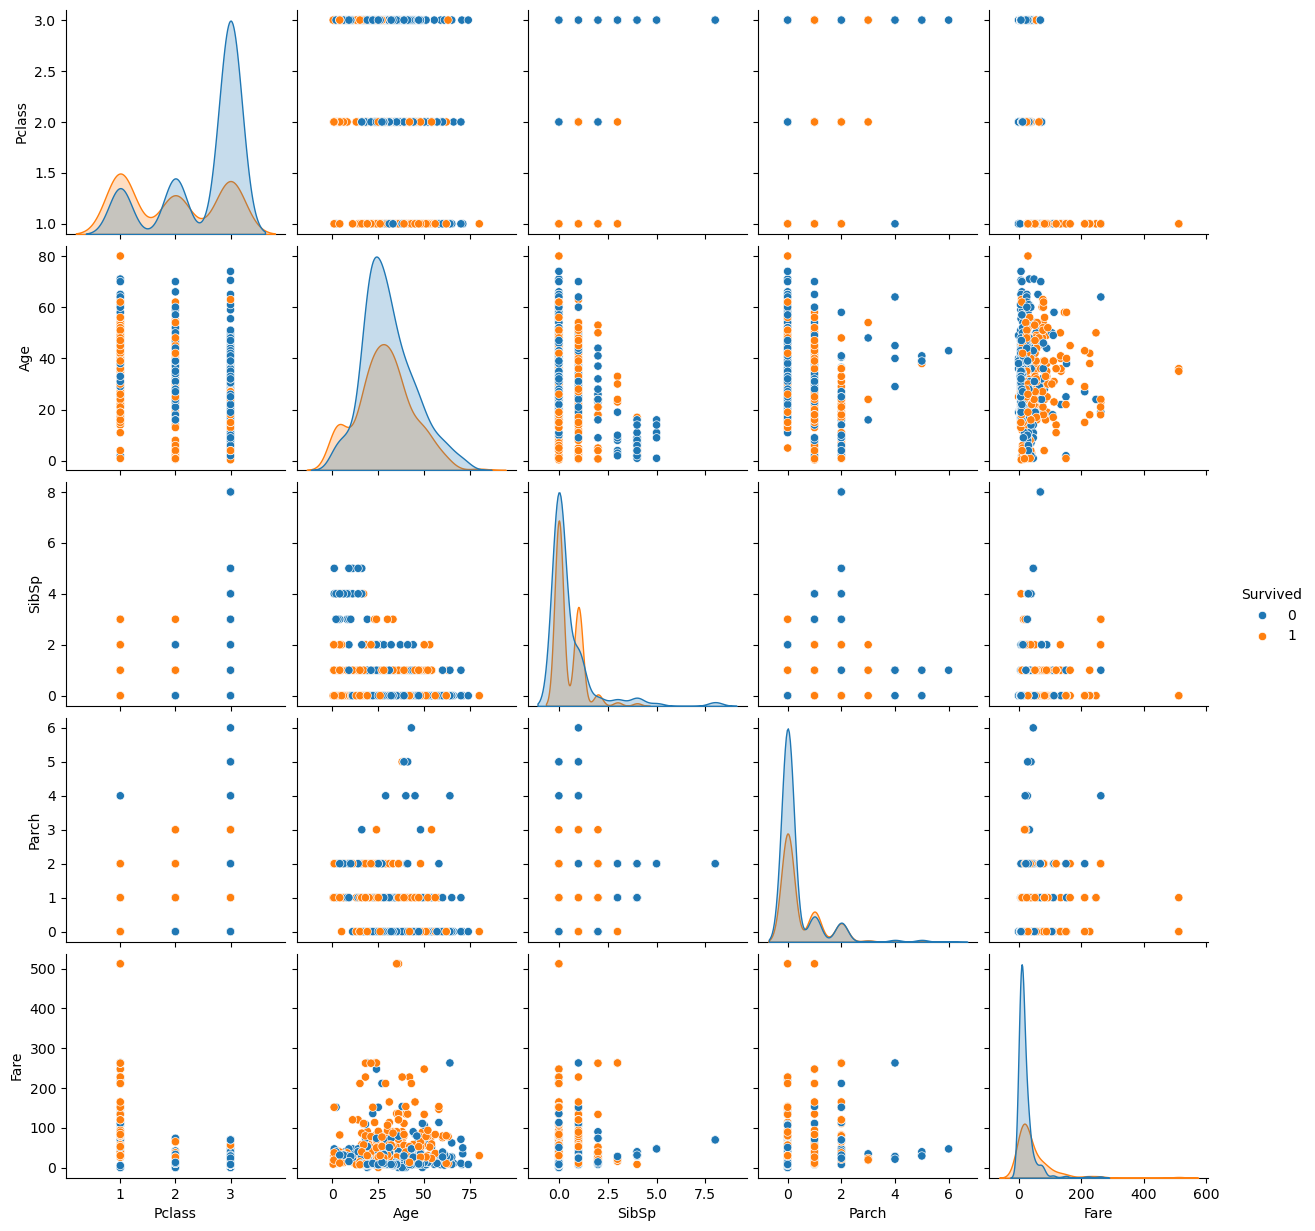

In [498]:
sns.pairplot(titanik_data[features], hue='Survived');

In [500]:
titanik_data[features].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


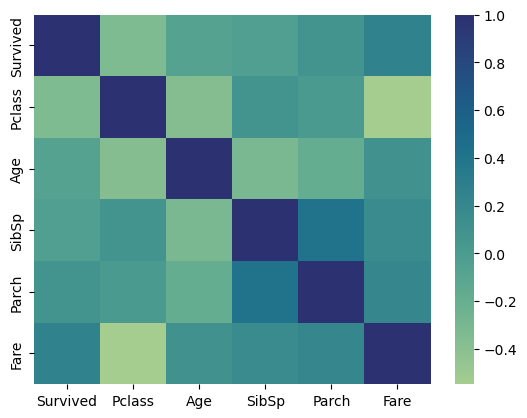

In [499]:
sns.heatmap(titanik_data[features].corr(),cmap="crest");

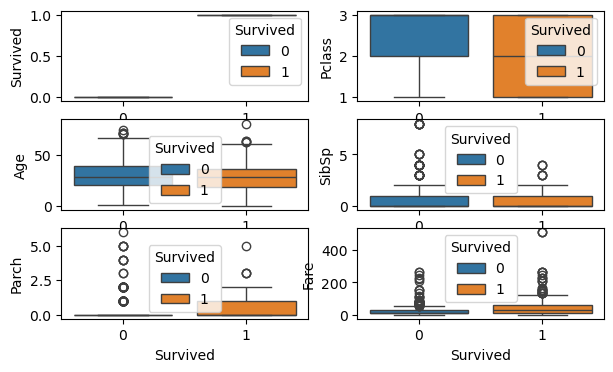

In [384]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 4))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Survived', y = feat, data = titanik_data[features], ax=axes[idx // 2, idx % 2],hue='Survived')
    axes[idx // 2, idx % 2].set_xlabel('Survived')
    axes[idx // 2, idx % 2].set_ylabel(feat);
plt.show();

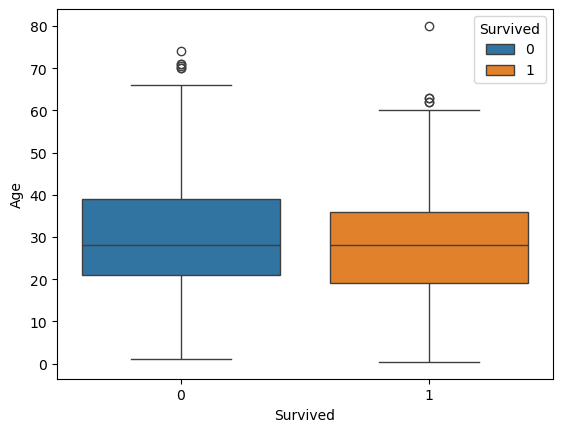

In [385]:
sns.boxplot(x='Survived', y = 'Age', data = titanik_data[features],hue='Survived');
plt.show();

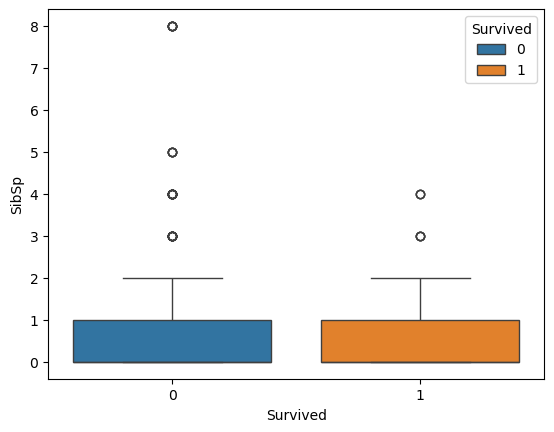

In [386]:
sns.boxplot(x='Survived', y = 'SibSp', data = titanik_data[features],hue='Survived');
plt.show();

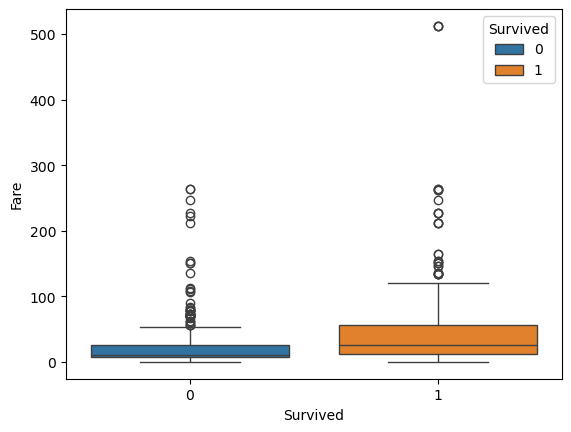

In [387]:
sns.boxplot(x='Survived', y = 'Fare', data = titanik_data[features],hue='Survived');
plt.show();

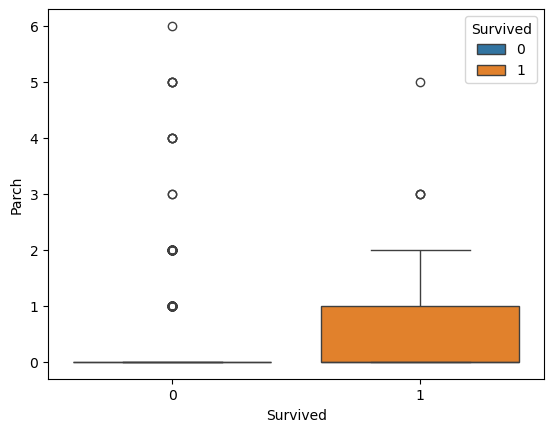

In [388]:
sns.boxplot(x='Survived', y = 'Parch', data = titanik_data[features],hue='Survived');
plt.show();

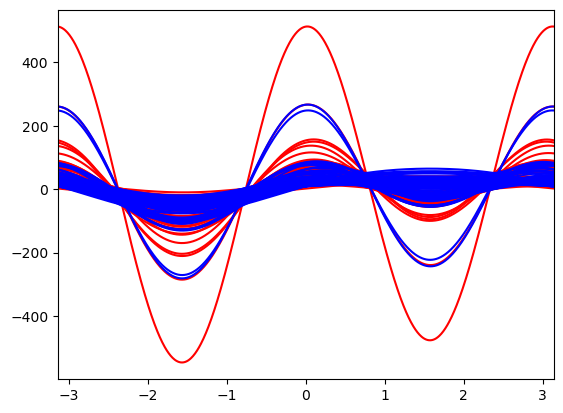

In [389]:
def andrews_curve(x,theta):
  curve = list()
  for th in theta:
    x1 = x[0] / np.sqrt(2)
    x2 = x[1] * np.sin(th)
    x3 = x[2] * np.cos(th)
    x4 = x[3] * np.sin(2.*th)
    x5 = x[4] * np.cos(2 * th)
    curve.append(x1+x2+x3+x4+x5)
  return curve

accuracy = 1000
sur = titanik_data[features][titanik_data['Survived'] == 1].drop('Survived', axis=1).values
dead = titanik_data[features][titanik_data['Survived'] != 1].drop('Survived', axis=1).values
theta = np.linspace(-np.pi, np.pi, accuracy)

for s in sur[:100]: # setosa
  plt.plot(theta, andrews_curve(s, theta), 'r')
for s in dead[:100]: # setosa
  plt.plot(theta, andrews_curve(s, theta), 'b')
plt.xlim(-np.pi,np.pi)
plt.show()

### z-score

In [390]:
titanik_data[features].head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


In [391]:
def my_z_score(X):
    m = np.mean(X)
    std = np.std(X)
    return (X - m) / std

In [392]:
#пример использования z-score для одного признака
titanik_data['Age'][abs(my_z_score(titanik_data['Age'])) >= 3 ]

630    80.0
851    74.0
Name: Age, dtype: float64

In [393]:
# использование z-score для всех количественных признаков
z_score_titanik_data = titanik_data.copy()
for feature in features:
    print(feature.upper())
    z_score_titanik_data = z_score_titanik_data[abs(my_z_score(titanik_data[feature])) < 3]


SURVIVED
PCLASS
AGE
SIBSP
PARCH
FARE


/var/folders/c8/kq3cwkq944qb08638jvnj63m0000gn/T/ipykernel_51690/793859372.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z_score_titanik_data = z_score_titanik_data[abs(my_z_score(titanik_data[feature])) < 3]
/var/folders/c8/kq3cwkq944qb08638jvnj63m0000gn/T/ipykernel_51690/793859372.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z_score_titanik_data = z_score_titanik_data[abs(my_z_score(titanik_data[feature])) < 3]
/var/folders/c8/kq3cwkq944qb08638jvnj63m0000gn/T/ipykernel_51690/793859372.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z_score_titanik_data = z_score_titanik_data[abs(my_z_score(titanik_data[feature])) < 3]


In [394]:
z_score_titanik_data[features]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
884,0,3,25.0,0,0,7.0500
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


### IQR

In [395]:
np.median([1,3,4,5])

3.5

In [396]:
def my_iqr(X):
    if len(X) % 2 == 1:
        X_left = X[:len(X) // 2 + 1]
        X_right = X[len(X) // 2 :]
    else:
        X_left = X[:len(X) // 2 + 1]
        X_right = X[len(X) // 2 - 1:]
    # что-то не так, не совпадает со встроенной
    return np.median(X_left), np.median(X), np.median(X_right)

In [397]:
np.percentile([1,3,4,5,6,7], [25, 50, 75])

array([3.25, 4.5 , 5.75])

In [398]:
def IQR(X):
    """_summary_
    Args:
        X (np.array): вектор данных

    Returns:
        tuple: нижняя и вернхняя границы
    """
    q1, q3 = np.percentile(X, [25, 75])
    iqr =  q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return low, high

In [399]:
iqr_titanik_data = titanik_data.copy()
for feature in features:
    low, high = IQR(iqr_titanik_data[feature].dropna().values)
    iqr_titanik_data = iqr_titanik_data[np.all([np.array(iqr_titanik_data[feature]<= high), np.array(iqr_titanik_data[feature]  >= low)], axis=0)]
    
iqr_titanik_data, len(iqr_titanik_data) 

(     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
 0           0       3    male  22.0      1      0   7.2500   NaN        S
 2           1       3  female  26.0      0      0   7.9250   NaN        S
 3           1       1  female  35.0      1      0  53.1000  C123        S
 4           0       3    male  35.0      0      0   8.0500   NaN        S
 6           0       1    male  54.0      0      0  51.8625   E46        S
 ..        ...     ...     ...   ...    ...    ...      ...   ...      ...
 884         0       3    male  25.0      0      0   7.0500   NaN        S
 886         0       2    male  27.0      0      0  13.0000   NaN        S
 887         1       1  female  19.0      0      0  30.0000   B42        S
 889         1       1    male  26.0      0      0  30.0000  C148        C
 890         0       3    male  32.0      0      0   7.7500   NaN        Q
 
 [436 rows x 9 columns],
 436)

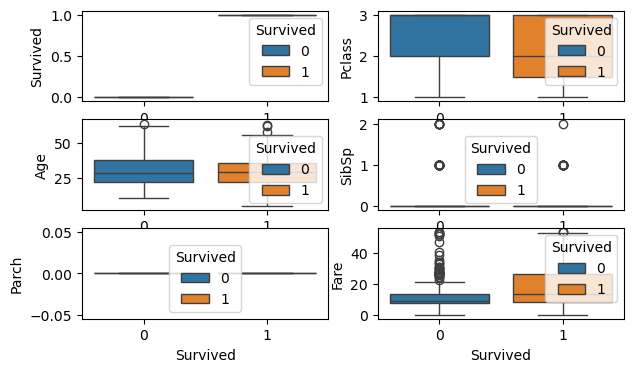

In [400]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 4))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Survived', y = feat, data = iqr_titanik_data[features], ax=axes[idx // 2, idx % 2],hue='Survived')
    axes[idx // 2, idx % 2].set_xlabel('Survived')
    axes[idx // 2, idx % 2].set_ylabel(feat);
plt.show();

<Axes: xlabel='Survived', ylabel='Parch'>

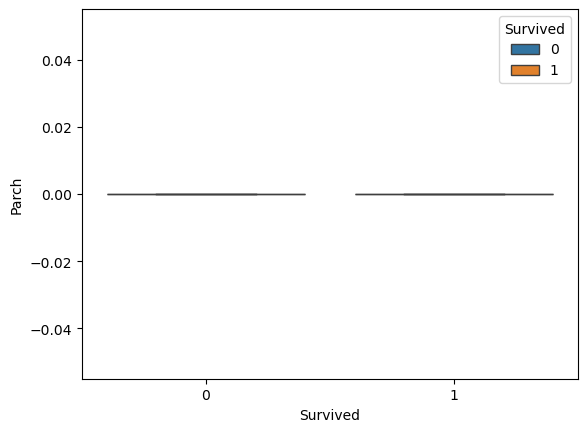

In [404]:
sns.boxplot(x='Survived', y = 'Parch', data = iqr_titanik_data[features],hue='Survived')


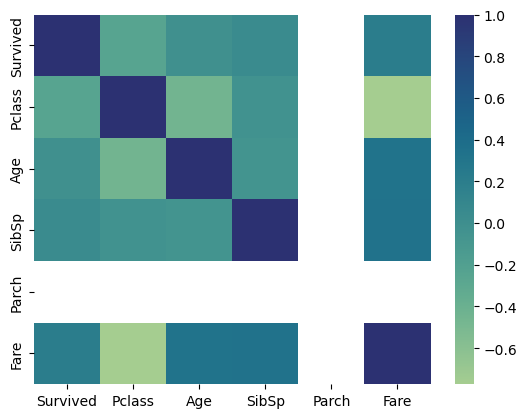

In [39]:
sns.heatmap(iqr_titanik_data[features].corr(),cmap="crest");

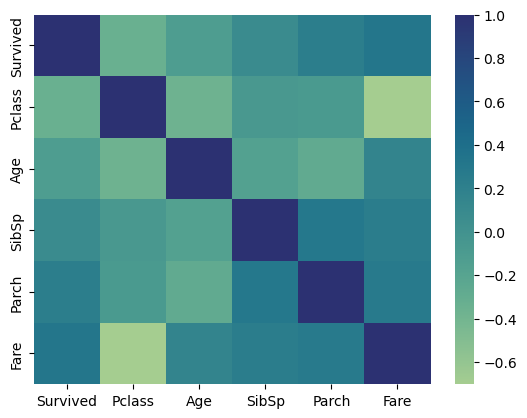

In [40]:
sns.heatmap(z_score_titanik_data[features].corr(),cmap="crest");

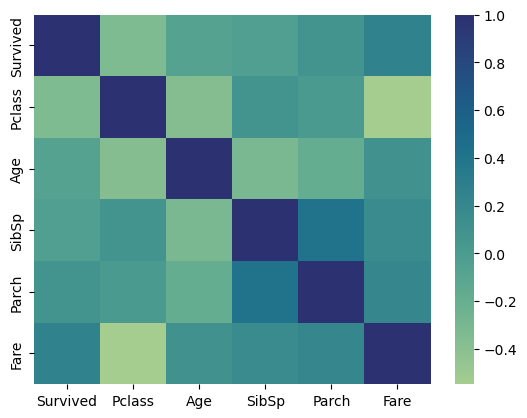

In [41]:
sns.heatmap(titanik_data[features].corr(),cmap="crest");

In [42]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [43]:
features1 = features.copy()
features1.remove('SibSp')
imp.fit(iqr_titanik_data[features1])
arr = imp.transform(iqr_titanik_data[features1])
data = pd.DataFrame(arr, columns=features1)
data.to_csv('titanik_iqr.csv', index=False)

In [44]:
imp.fit(z_score_titanik_data[features])
arr = imp.transform(z_score_titanik_data[features])
data = pd.DataFrame(arr, columns=features)
data.to_csv('titanik_z.csv', index=False)

## Операторы 

In [405]:
data = pd.read_csv('telecom.csv')
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [407]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [415]:
features = list(data.columns)
for feature in features:
    print(data[feature].value_counts())

State
WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
CO     66
NV     66
WA     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
Account length
105    43
87     42
93     40
101    40
90     39
       ..
188     1
4       1
200     1
8       1
175     1
Name: count, Length: 212, dtype: int64
Area code
415    1655
510     840
408     838
Name: count, dtype: int64
International plan
No     3010
Yes     323
Name: count, dtype: int64
Voice mail plan
No     2411
Yes     922
Name: count, dtype: int64
Number vmail messages
0     2411
31      60
29      53
28      51
33      46
30      44

In [418]:
features.__len__()

20

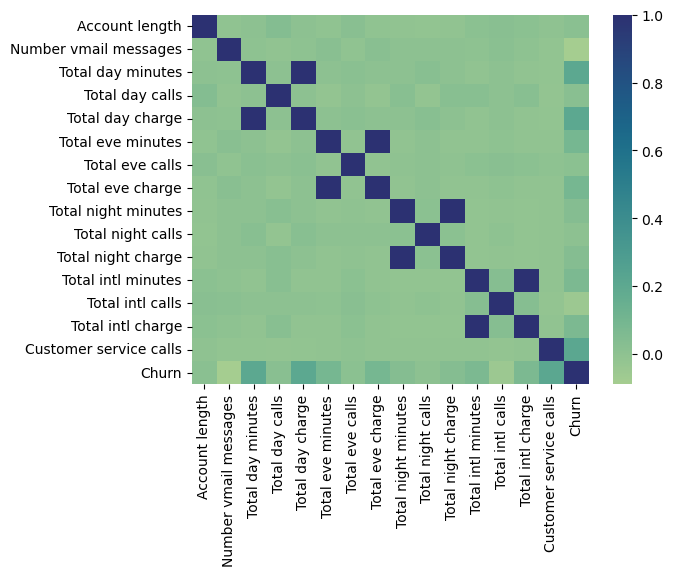

In [421]:
corr_matrix = data.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr() #оставляем только количественные фичи


sns.heatmap(corr_matrix,cmap="crest");

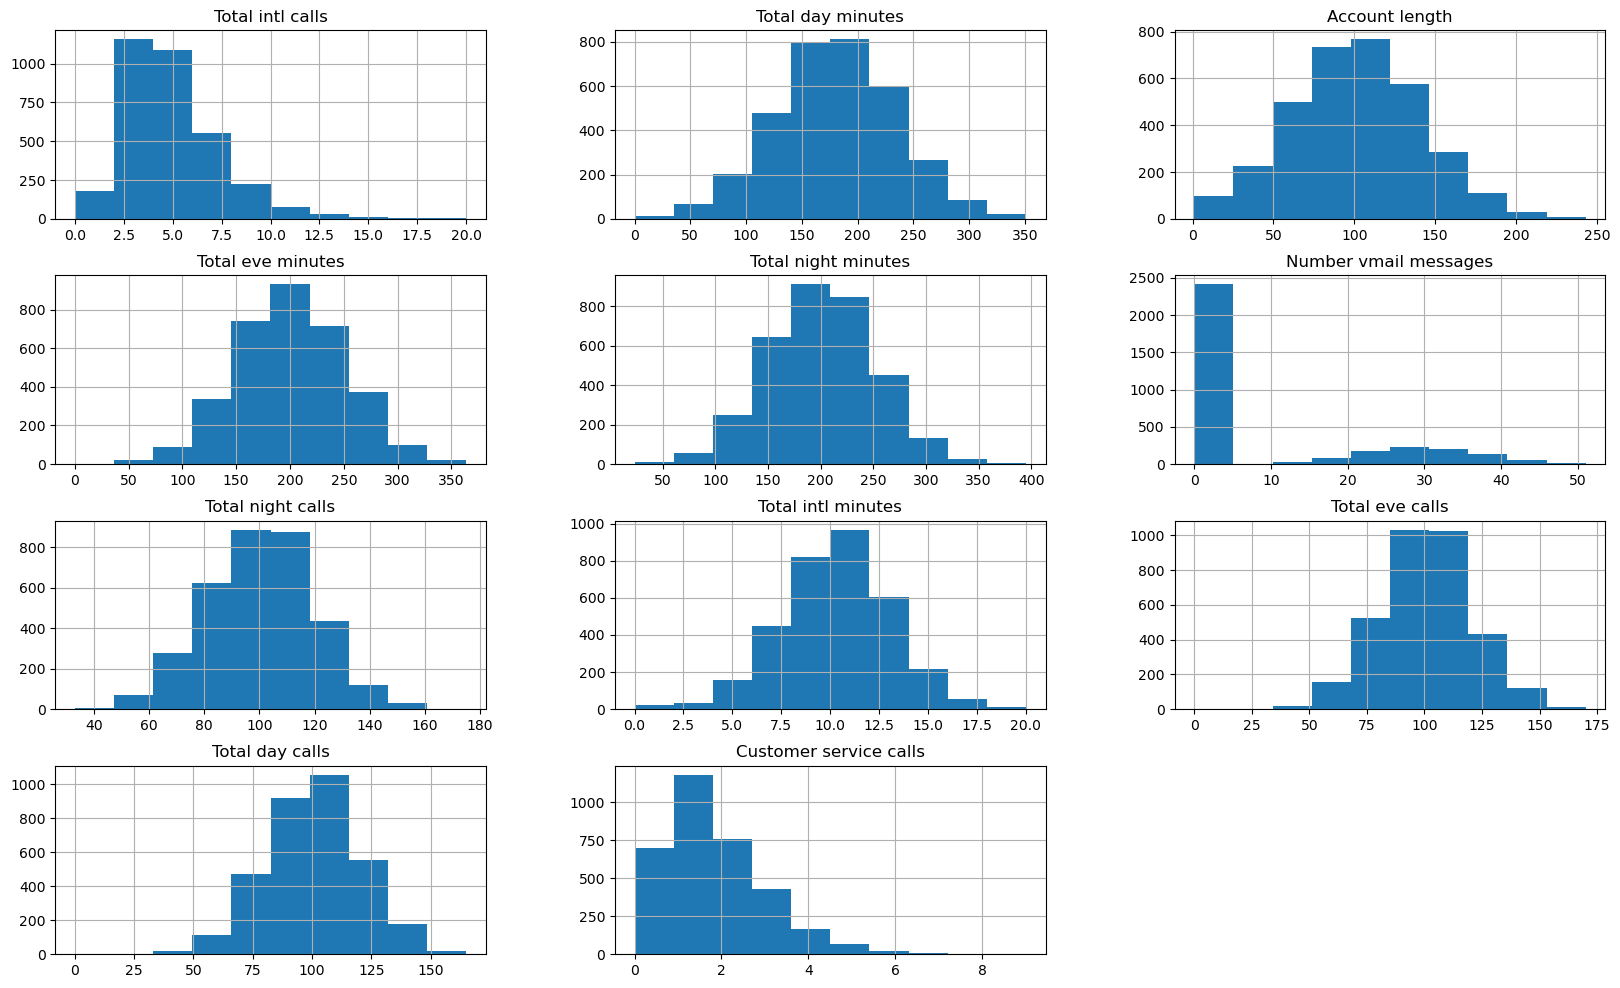

In [422]:
features = list(set(data.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn','Intensive_service_calls_Q','Phone number']))
data[features].hist(figsize=(20,12));

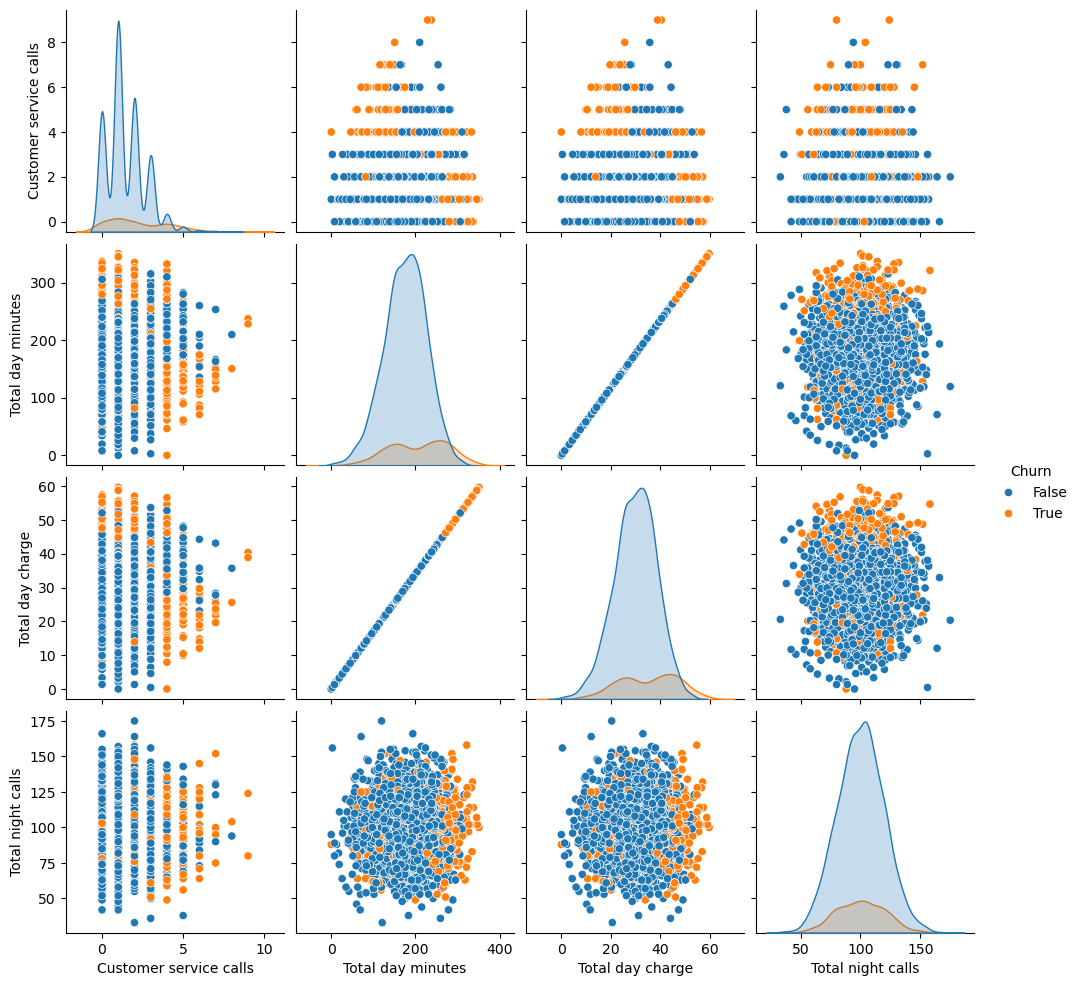

In [423]:
sns.pairplot(data[['Customer service calls','Total day minutes','Total day charge','Total night calls','Churn',]], hue='Churn');

In [565]:
x = data.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code', "Churn", 'Total night calls', 'Total eve calls', 'Total eve minutes',
                      'Account length'], axis=1) #оставляем только количественные фичи
y = data['Churn']



X_train, X_test, y_train, y_test = train_test_split(x.values, y, test_size=0.3, random_state=42) 
make_pipeline(StandardScaler(), LogisticRegression(penalty=None))
inner_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty=None))])

In [566]:
accuracy_score(y_train, inner_model.predict(X_train)), accuracy_score(y_test, inner_model.predict(X_test))

(0.8594084869267038, 0.86)

In [568]:
xx = data.copy()
features = list(x.columns)
for feature in features:
    xx = xx[abs(my_z_score(xx[feature])) <= 3]
    
    

In [569]:
xx.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code', 'Total night calls'], axis=1).corr()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,0.003339,0.009042,0.038069,0.009040,-0.007671,0.016461,-0.007660,-0.008443,-0.008452,0.011146,0.027251,0.011211,-0.001019,0.021293
Number vmail messages,0.003339,1.000000,-0.003302,-0.013215,-0.003306,0.016660,-0.006013,0.016674,0.011193,0.011180,-0.004352,-0.004300,-0.004322,-0.028124,-0.094979
Total day minutes,0.009042,-0.003302,1.000000,0.000604,1.000000,0.004970,0.027057,0.004957,0.001766,0.001745,-0.017678,-0.001543,-0.017635,0.001086,0.220944
Total day calls,0.038069,-0.013215,0.000604,1.000000,0.000608,-0.008210,0.006713,-0.008206,0.017105,0.017099,0.014136,0.007892,0.014248,-0.020380,0.021112
Total day charge,0.009040,-0.003306,1.000000,0.000608,1.000000,0.004977,0.027056,0.004963,0.001764,0.001743,-0.017677,-0.001543,-0.017635,0.001082,0.220942
Total eve minutes,-0.007671,0.016660,0.004970,-0.008210,0.004977,1.000000,-0.019301,1.000000,-0.017863,-0.017884,-0.010226,0.010726,-0.010233,-0.023788,0.096283
Total eve calls,0.016461,-0.006013,0.027057,0.006713,0.027056,-0.019301,1.000000,-0.019293,0.006414,0.006452,0.002370,0.003031,0.002372,-0.005037,0.010871
Total eve charge,-0.007660,0.016674,0.004957,-0.008206,0.004963,1.000000,-0.019293,1.000000,-0.017876,-0.017897,-0.010234,0.010728,-0.010241,-0.023793,0.096270
Total night minutes,-0.008443,0.011193,0.001766,0.017105,0.001764,-0.017863,0.006414,-0.017876,1.000000,0.999999,-0.013869,0.009274,-0.013879,-0.014552,0.039788
Total night charge,-0.008452,0.011180,0.001745,0.017099,0.001743,-0.017884,0.006452,-0.017897,0.999999,1.000000,-0.013873,0.009298,-0.013883,-0.014530,0.039797


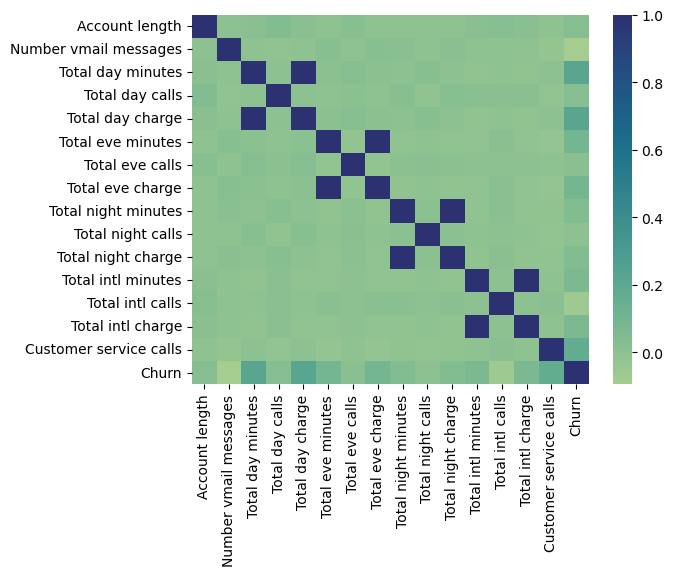

In [570]:
sns.heatmap(xx.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr(),cmap="crest");   

In [571]:
xx

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


## Классфицикация операторов связи

In [572]:
xxx = xx.drop(['Total night calls', 'Total eve calls', 'Total eve minutes',
                      'Account length'], axis=1) #оставляем только количественные фичи
y = xxx['Churn']

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(xxx.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code', "Churn"], axis=1).values, y, test_size=0.3, random_state=42) 
inner_model = make_pipeline(StandardScaler(), LogisticRegression(penalty=None))
inner_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty=None))])

In [573]:
accuracy_score(y_train, inner_model.predict(X_train)), accuracy_score(y_test, inner_model.predict(X_test))

(0.8699955015744489, 0.8562434417628542)

# <font color = 'red' size = 5>Задание 2 </font>

1. Изучите изложенный выше пример работы с текстовым датасетом. 
2. Подготовьте к дальнейшей работе текстовый датасет отзывов к фильмам. [Imdb - rews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) .
    +  2.1 Используя встроенные возможности *TfidfVectorizer*.
    +  2.2 Реализовав аналог самостоятельно.
    +  2.3 Подготовленный датасет сохраните в новый csv файл.
   
        



[https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)

In [574]:
import re

### Реализация собственного аналога TF-IDF

In [585]:
def del_punctuation(doc:str)->str:
    # удаление знаков припенания, а также других необходимых знаков
    pattern = r'[,.?!\-\+()\{\}\[\]\@\#\$\%\^\&\*\=}]'
    return re.sub(pattern, ' ', doc).lower()

In [586]:
def doc_to_list(doc:str):
    doc = del_punctuation(doc)
    words_list = [word for word in doc.split()]
    return words_list

In [587]:
def all_words(docs):
    l = list()
    for doc in docs:
        l += doc_to_list(doc)
    return list(set(l))
        

In [591]:
all_words(['Hello, my ?guy'])

['hello', 'guy', 'my']

In [600]:
def pre_tf(word: str, docs,  doc:str):
    doc_word_list = doc_to_list(doc)
    n_doc = doc_word_list.count(word)
    n_docs = 0
    for doc in docs:
       n_docs += doc_to_list(doc).count(word)
    return n_doc, n_docs

In [602]:
def tf(n_doc, n_docs):
    return n_doc, n_docs

In [598]:
Document1= "It is going to rain today. going"
Document2= "Today I am not going outside."
Document3= "He am going to watch the season premiere."
Doc = [Document1 ,
       Document2 , 
       Document3]

In [604]:
tf(*pre_tf('going', Doc, Doc[0]))

(2, 4)

In [605]:
def idf(word, docs, doc):
    n_doc = doc_to_list(doc).count(word)
    if n_doc != 0:
        return np.log(len(docs) / n_doc)

### Использование встроенного TfidfVectorizer

In [45]:
import nltk
from nltk.corpus import stopwords

In [46]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [300]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
l = list()
file_path = 'IMDB Dataset.csv'
data = pd.read_csv(file_path).drop_duplicates()
y = data.sentiment.values
x = data.review
print(np.shape(x))

(49582,)


In [190]:
x[0], y[0]

("One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [191]:
#изначальное количество
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
X 

<49582x101895 sparse matrix of type '<class 'numpy.float64'>'
	with 6773763 stored elements in Compressed Sparse Row format>

In [192]:
global stop_words
stop_words = np.array(list(set(stopwords.words('english'))))


In [193]:
def my_preprocessing(text:str)->str:
    # удаление лишних знаков применания, а также приведение к нижнему регистру
    cleared_text_list = re.sub(r'[^A-z()!?\-\' ]+', ' ', re.sub(r'<br /><br />', ' ', re.sub(r'_+', ' ', text))).lower().split()
    # удаление стоп-слов 
    cleared_text = [word for word in cleared_text_list if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    final_text = [lemmatizer.lemmatize(word) for word in cleared_text]
    final_text = [stemmer.stem(word) for word in final_text]
    return " ".join(final_text)
    

In [196]:
xx = x.apply(lambda s: my_preprocessing(s))
xx.values[0]

"one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focu mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact go show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic (crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experience) watch oz may becom comfort uncomfort view that get touch da

In [197]:
alphabet = 'qazxswedcvfrtgbnhyujmkilop'
def del_long_letters(text):
    for i in alphabet:
        pattern = r'0{3,}'.replace('0', i)
        text = re.sub(pattern,' ', text)
        pattern = r'0{3,} '.replace('0', i)
        text = re.sub(pattern,' ', text)
        text = re.sub(r'  ', ' ', text)
    return text


In [198]:
def my_preprocessing2(text:str)->str:
    # удаление лишних знаков применания, а также приведение к нижнему регистру
    clear_text =  re.sub(r'[@=~{}\|&\[\]#№\-:;\+!()\?^%]', ' ', text)
    return del_long_letters(clear_text)


In [199]:
my_preprocessing2('fjfj ffffffff % #')

'fjfj '

In [200]:
new_x = xx.apply(lambda s: my_preprocessing2(s))

In [201]:
def my_preprocessing3(text:str)->str:
    for i in ('xx', 'vv', 'ww', 'jj', 'qq'):
        pattern = r'0'.replace('0', i)
        text = re.sub(pattern,' ', text)
        pattern = r'0 '.replace('0', i)
        text = re.sub(pattern,' ', text)
        text = re.sub(r'  ', ' ', text)
    text_list = [i for i in text.split() if len(i) < 17]
    return ' '.join(text_list)

In [202]:
new_x = new_x.apply(lambda s: my_preprocessing3(s))

In [203]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_x.values)
X 

<49582x80820 sparse matrix of type '<class 'numpy.float64'>'
	with 4718330 stored elements in Compressed Sparse Row format>

In [204]:
new_x.to_csv('new_texts.csv')

In [205]:
import os
os.stat('new_texts.csv')

os.stat_result(st_mode=33188, st_ino=57928005, st_dev=16777233, st_nlink=1, st_uid=501, st_gid=20, st_size=36844543, st_atime=1729635621, st_mtime=1729635619, st_ctime=1729635619)

In [206]:
os.stat('IMDB Dataset.csv')

os.stat_result(st_mode=33204, st_ino=57813698, st_dev=16777233, st_nlink=1, st_uid=501, st_gid=20, st_size=66212309, st_atime=1729540325, st_mtime=1729415374, st_ctime=1729415375)

In [207]:
with open('wordsss.txt', 'w') as f:
    for i in vectorizer.get_feature_names_out():
        f.write(i + '\n')

In [208]:
X

<49582x80820 sparse matrix of type '<class 'numpy.float64'>'
	with 4718330 stored elements in Compressed Sparse Row format>

In [210]:
f'{49582*80820 * 8// 10**9} гб'

'32 гб'

In [211]:
import scipy.sparse as sp
import pandas as pd
sparse_matrix = X

# Преобразуем разреженную матрицу в DataFrame
non_zero_elements = sparse_matrix.nonzero()
non_zero_elements

(array([    0,     0,     0, ..., 49581, 49581, 49581], dtype=int32),
 array([64425, 16949, 72478, ..., 22561, 77736, 50708], dtype=int32))

In [212]:
print(X)

  (0, 64425)	0.048450503006314274
  (0, 16949)	0.07885669154257782
  (0, 72478)	0.049828693225855626
  (0, 71076)	0.035837286217229425
  (0, 76729)	0.0436527205751117
  (0, 74348)	0.07482489344636072
  (0, 13976)	0.06851496051671081
  (0, 5973)	0.04001954608981244
  (0, 44194)	0.03930996181633627
  (0, 23473)	0.09561996884712763
  (0, 65001)	0.06030919134921987
  (0, 68134)	0.055047907876168464
  (0, 39447)	0.045598076359706016
  (0, 7157)	0.08205248668840243
  (0, 73616)	0.03730289673825721
  (0, 13123)	0.05365974661345471
  (0, 45602)	0.05483135149874394
  (0, 43358)	0.06002726355620271
  (0, 78078)	0.02666256170686464
  (0, 27946)	0.04927764757158112
  (0, 50959)	0.05087862881063363
  (0, 38247)	0.04008549159435412
  (0, 34943)	0.17538797062089967
  (0, 49074)	0.10895180934581769
  (0, 65959)	0.07452838253719138
  :	:
  (49581, 34462)	0.09876845003544207
  (49581, 79414)	0.09195829265247567
  (49581, 10423)	0.08277637953336164
  (49581, 67329)	0.0822214023667892
  (49581, 48635)	0.0

In [213]:
df = pd.DataFrame({'row':non_zero_elements[0], 'column': non_zero_elements[1], 'value': np.array(X[non_zero_elements[0], non_zero_elements[1]])[0]})
df.head(4)

,row,column,value
0,0,64425,0.048451
1,0,16949,0.078857
2,0,72478,0.049829
3,0,71076,0.035837


In [214]:
df.to_csv('comments.csv', index=False)

# <font color = 'red' size = 5>Задание 3 </font>

Используя встроенные возможности *python* реализуйте простую модель классифиакатора для данных из з. 1 и з. 2. Сделайте выводы о точности, используя метрику *accurancy_score*.


## Классификация комментов

In [319]:
from sklearn.metrics import accuracy_score

In [320]:
l = lambda s: 1 if s == 'positive' else 0
l

<function __main__.<lambda>(s)>

In [321]:
y = data.sentiment.values

In [322]:
y_data = [l(i) for i in y]
y_data.__len__()

49582

In [323]:
X.shape[0]

49582

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

In [325]:

inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_train, y_train)


print(accuracy_score(y_train, inner_model.predict(X_train)))
print(accuracy_score(y_test, inner_model.predict(X_test)))
inner_model.coef_, inner_model.intercept_

0.9998847494741695
0.8664873949579832


(array([[-15.22842009,  -3.34963128,   3.38169815, ...,  -1.76141416,
          -0.31139908,  -4.73246012]]),
 array([1.55484557]))

In [326]:
data.values[34]

array(["I watched this film not really expecting much, I got it in a pack of 5 films, all of which were pretty terrible in their own way for under a fiver so what could I expect? and you know what I was right, they were all terrible, this movie has a few (and a few is stretching it) interesting points, the occasional camcorder view is a nice touch, the drummer is very like a drummer, i.e damned annoying and, well thats about it actually, the problem is that its just so boring, in what I can only assume was an attempt to build tension, a whole lot of nothing happens and when it does its utterly tedious (I had my thumb on the fast forward button, ready to press for most of the movie, but gave it a go) and seriously is the lead singer of the band that great looking, coz they don't half mention how beautiful he is a hell of a lot, I thought he looked a bit like a meercat, all this and I haven't even mentioned the killer, I'm not even gonna go into it, its just not worth explaining. Anyway 

## Классификация выживших на титанике

In [513]:
data_old = pd.read_csv('train.csv')
features = ['Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']
data_old = data_old[features]
data_old

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [471]:
data_z = pd.read_csv('titanik_z.csv')
data_z

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
652,0.0,3.0,25.0,0.0,0.0,7.0500
653,0.0,2.0,27.0,0.0,0.0,13.0000
654,1.0,1.0,19.0,0.0,0.0,30.0000
655,1.0,1.0,26.0,0.0,0.0,30.0000


In [472]:
x = data_z.drop(['Survived'], axis=1).values
x[:5]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ]])

In [473]:
y = data_z['Survived'].values
y[:10]

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [474]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [475]:
inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_train, y_train)


LogisticRegression(penalty=None)

In [476]:
accuracy_score(y_train, inner_model.predict(X_train))

0.7080610021786492

In [477]:
accuracy_score(y_test, inner_model.predict(X_test))

0.7121212121212122

In [478]:
data_iqr = pd.read_csv('titanik_iqr.csv')
data_iqr

,Survived,Pclass,Age,Parch,Fare
0,0.0,3.0,22.0,0.0,7.2500
1,1.0,3.0,26.0,0.0,7.9250
2,1.0,1.0,35.0,0.0,53.1000
3,0.0,3.0,35.0,0.0,8.0500
4,0.0,1.0,54.0,0.0,51.8625
...,...,...,...,...,...
431,0.0,3.0,25.0,0.0,7.0500
432,0.0,2.0,27.0,0.0,13.0000
433,1.0,1.0,19.0,0.0,30.0000
434,1.0,1.0,26.0,0.0,30.0000


In [479]:
x = data_iqr.drop('Survived', axis=1).values
x[:5]

array([[ 3.    , 22.    ,  0.    ,  7.25  ],
       [ 3.    , 26.    ,  0.    ,  7.925 ],
       [ 1.    , 35.    ,  0.    , 53.1   ],
       [ 3.    , 35.    ,  0.    ,  8.05  ],
       [ 1.    , 54.    ,  0.    , 51.8625]])

In [480]:
y = data_iqr['Survived'].values
y[:10]

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1.])

In [481]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [482]:
inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [483]:
accuracy_score(y_train, inner_model.predict(X_train)), accuracy_score(y_test, inner_model.predict(X_test))


(0.7245901639344262, 0.7099236641221374)

In [540]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
features = ['Survived',	'Pclass', 'Age']


In [541]:
x = imp.fit_transform(data_old[features[1:]])
y = data_old.Survived
x, y

(array([[ 3., 22.],
        [ 1., 38.],
        [ 3., 26.],
        ...,
        [ 3., 24.],
        [ 1., 26.],
        [ 3., 32.]]),
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [542]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [543]:
inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_train, y_train)
accuracy_score(y_train, inner_model.predict(X_train)), accuracy_score(y_test, inner_model.predict(X_test))

(0.6918138041733547, 0.7276119402985075)